## Trabalho 1
**Apresente um trabalho sobre aplicação do algoritmo Naïve-Bayes para:
(i) a detecção de Spam em mensagens de email**

* Para a realização desse trabalho foi utilizado o seguinte dataset: https://github.com/NStugard/Intro-to-Machine-Learning/blob/main/spam.csv

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv("spam.csv")

In [92]:
data.head(n=10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Dividindo o conjunto de dados

* Dados de teste: 20%
* Dados de treino: 80%

In [93]:
#Dividindo os dados de treino e de teste
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
#Fazendo a contagem do numero de instâncias para cada classe (treino e teste)
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

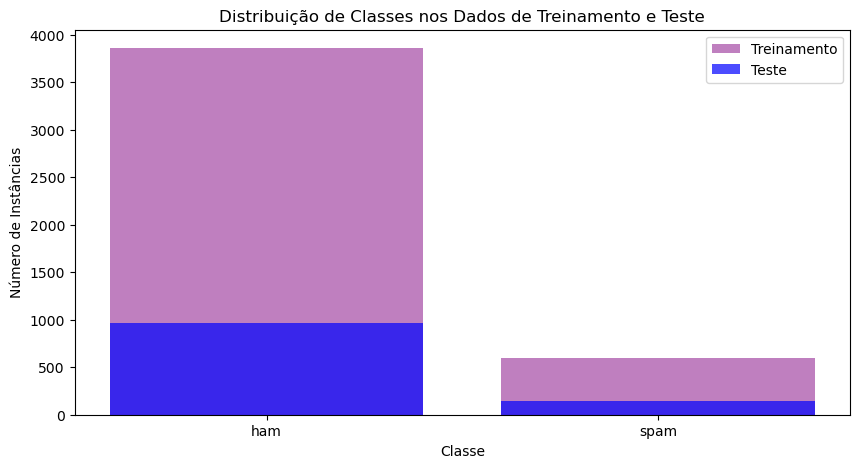

In [95]:
#Criando o gráfico

plt.figure(figsize=(10,5))
#Dados de treinamento
plt.bar(train_counts.index, train_counts.values,alpha=0.5, label='Treinamento',color='purple')
# Dados de teste
plt.bar(test_counts.index, test_counts.values,alpha=0.7, label='Teste', color='blue')

plt.xlabel('Classe')
plt.ylabel('Número de Instâncias')
plt.title('Distribuição de Classes nos Dados de Treinamento e Teste')
plt.legend()
plt.show();

## Vetorização das mensagens

* Utilizando o **CountVectorizer()** é possível fazer o processo desde a segmentação até criação da matriz de ocorrências de cada palavra dentro de uma mensagem;
* O **CountVectorizer()** faz a vetorização das mensagens, colocando-as em uma matriz de ocorrências onde cada linha representa uma mensagem, e cada coluna, uma palavra e sua quantidade em uma determinada mensagem.

In [96]:
# Vetorizando as mensagens de e-mail
vet = CountVectorizer()
X_train_vet = vet.fit_transform(X_train)
X_test_vet = vet.transform(X_test)

## Criando o modelo 
Para criar o modelo de Naive-Bayes utilizamos a função **MultinominalNB()**

In [97]:
# Criando e treinando o modelo Naive-Bayes
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train_vet, y_train)

MultinomialNB()

## Usando o modelo
Agora que o modelo está criado, fazemos previsões usando o modelo para testar.

In [102]:
# Fazendo previsões com o modelo treinado
y_pred = modelo_NB.predict(X_test_vet)

## Verificando a eficácia do modelo

In [103]:
precision_score(y_test, y_pred,average='micro')

0.9919282511210762

## Resultado
* Índice de Precisão: proporção das mensagens positivas em relação as que foram previstas como positivas;
* Índice de Recall: proporção das mensagens positivas em relação as que realmente são positivas;
* Índice de F1-score: é a média harmônica entre os índices de precisão e recall;
* Índice de Support: Mostra a quantidade de dados utilizados no teste;

In [109]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



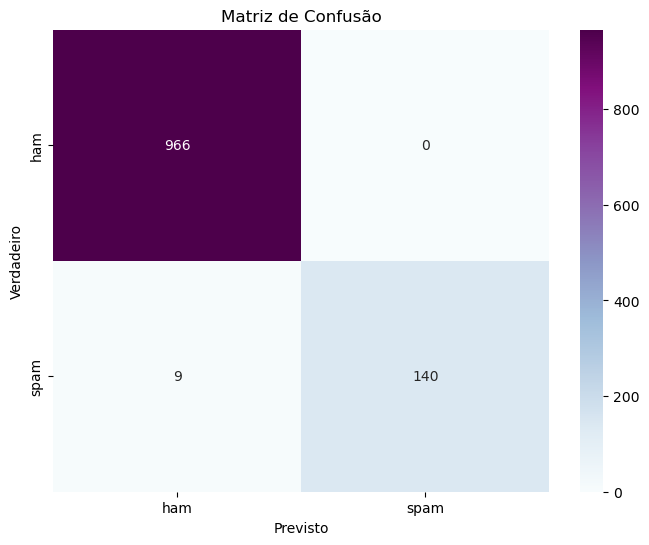

In [111]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='BuPu', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()